<a href="https://colab.research.google.com/github/vishwanathbeena/appliedai_practice/blob/main/Haberman_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Loading habermans dataset
#Data dictionary found from  online
#Age of patient at the time of operation (numerical)
#Patient’s year of operation (year — 1900, numerical)
#Number of positive axillary nodes detected (numerical)
#Survival status (class attribute) :
#1 = the patient survived 5 years or longer
#2 = the patient died within 5 years
data = pd.read_csv('/content/haberman.csv')

In [4]:
data.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


# EDA

In [5]:
data.shape

(306, 4)

We have 306 rows and 4 columns

In [36]:
data['status'].value_counts(normalize=True)

Survived    0.735294
Dead        0.264706
Name: status, dtype: float64

This is an imbalanced dataset,where we have more patients who survived more than 5 years than the patients who did not more than 5 years.

In [7]:
#lets see if there are any missing values.
missing_value_cols = [col for col in data.columns if data[col].isnull().sum() > 0]
print(len(missing_value_cols))

0


So, We do not have an columns with missing data.It's good, we do not have to do any missing vale imputations, But, It's also bad, as we can not learn about missing value imputations at this stage. :-)

In [8]:
#mapping status to survived and Dead,because 1 and 2 are not so intuitive.
target_mapping = {1:'Survived',2:'Dead'}
data['status'] = data['status'].map(target_mapping)
data.head()

,age,year,nodes,status
0,30,64,1,Survived
1,30,62,3,Survived
2,30,65,0,Survived
3,31,59,2,Survived
4,31,65,4,Survived


In [9]:
data_survived = data.loc[data['status'] == 'Survived']
data_dead = data.loc[data['status'] != 'Survived']

In [10]:
data_survived.describe()

,age,year,nodes
count,225.000000,225.000000,225.000000
mean,52.017778,62.862222,2.791111
std,11.012154,3.222915,5.870318
min,30.000000,58.000000,0.000000
25%,43.000000,60.000000,0.000000
50%,52.000000,63.000000,0.000000
75%,60.000000,66.000000,3.000000
max,77.000000,69.000000,46.000000


In [11]:
data_dead.describe()

,age,year,nodes
count,81.000000,81.000000,81.000000
mean,53.679012,62.827160,7.456790
std,10.167137,3.342118,9.185654
min,34.000000,58.000000,0.000000
25%,46.000000,59.000000,1.000000
50%,53.000000,63.000000,4.000000
75%,61.000000,65.000000,11.000000
max,83.000000,69.000000,52.000000


With abobe two stats, We can say that mean age of both survived and dead patients almost same.same is the case with median.

IQR of age is also about same in both survoved and dead.

minimm and maximum age groups is also similar in survived and dead patients

By considering all above there is significant overlap betwee these groups.to confirm we can see histogram.

significate difference is observed betwwen mean number of nodes on survived and dead.

IQR of nodes in survived is 0 to 3, where as IQR of nodes in dead paients is from 1 to 11.

median number of nodes in survived patients is 0 where as median number of nodes in dead patients is 4.


No handles with labels found to put in legend.


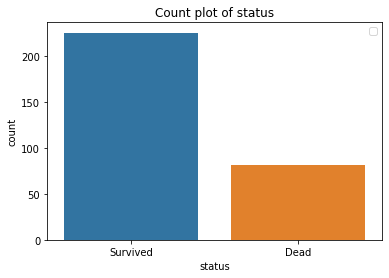

In [13]:
#countplot in Seaborn
sns.countplot(x=data['status'])
plt.title('Count plot of status')
plt.legend()
plt.show()

This is samething we got vale_count, but just in graphical manner, we can say  we have more peope survived than dead.

# Univariate analysis

# PDF

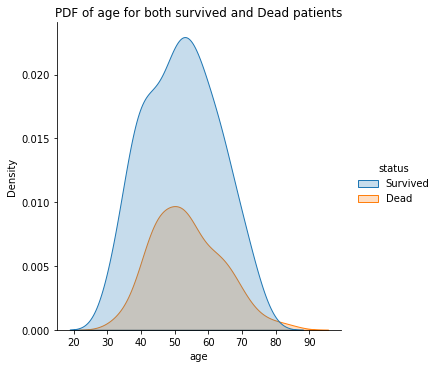

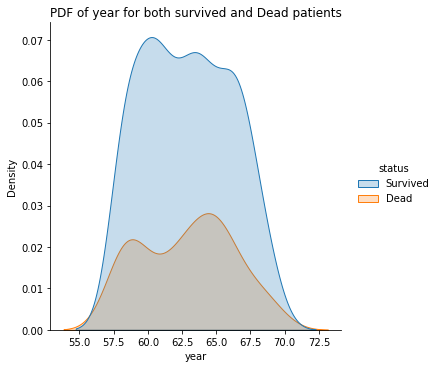

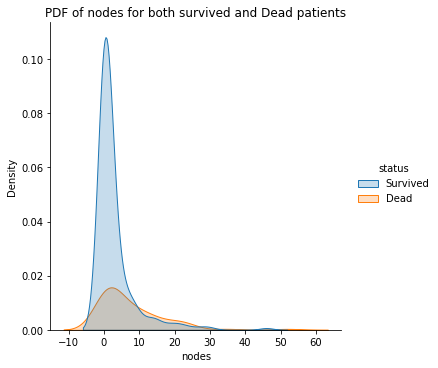

In [22]:
features = [feature for feature in data.columns if data[feature].dtypes != 'O']
for feature in features:
  sns.displot(data=data,x=feature,hue='status',kind='kde',fill='True')
  plt.title('PDF of {} for both survived and Dead patients'.format(feature))
  plt.show()

***Age :*** 
1.If we observe kdeplot of age, there is significant overlap between Survived and dead.
2.Yet, we can observe, that the probability of surviving is more between ages 30 to 80.Since, Survival PDF is higher in this region when compared to dead PDF.
3.probablity of survival between ages 30 to 50 is far higher than the probability of death.
4.If age more than 80,probability of surviving is less than probability of dead.
5.Age it self on it's own is not a significant factor in determing the survival status.

***Year of Operation:***
1.Here also significate overlap has been observed.
2.When compared,more people who got operated betwee 60-65 years have more death rate.
3.overall,in every year survival rate is more than death rate.
4.This can not be used to predict survival status of patient.
5.Histogram looks like Bi-Modal for dead patients.

***Nodes:***
1.people with less than 10 affected nodes have more survival rate.
2.If number of affected nodes are more than 10 then probabilit of deah is more than survival.
3.Looks like a log-normal distribution.


# CDF

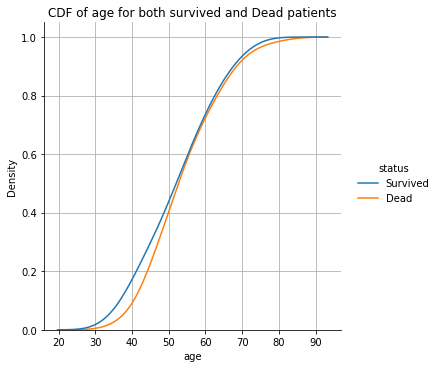

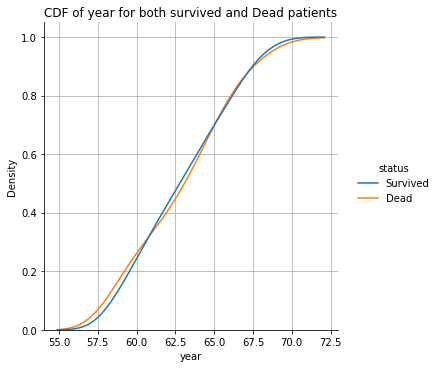

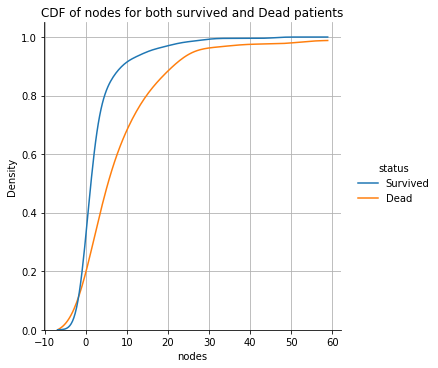

In [23]:
for feature in features:
  sns.displot(data=data,x=feature,hue='status',kind='kde',cumulative='True',common_grid=True,common_norm=False)
  #sns.displot(data=data,x=feature,cumulative='True',hue='status',col='status',kind='kde',fill='True')
  plt.grid()
  plt.title('CDF of {} for both survived and Dead patients'.format(feature))
  plt.show()

***Age:***
1.Since there is significant overlap in age column between survived and dead,even CDF shows that.But from CDF we can say,tehre is slightly higher number of people who survived for given age. for example,people aged below 40 have a probabilty of surviving at around 20% where as probability of death foe people aged below 40 is around 10%.

***Nodes:***
People with lesser nodes survive more.around 90% of people who survived are having nodes less than or equal to 10.

around 35% of people who have nodes more than 10 have died.


# Bibariate analysis
#Pair plots

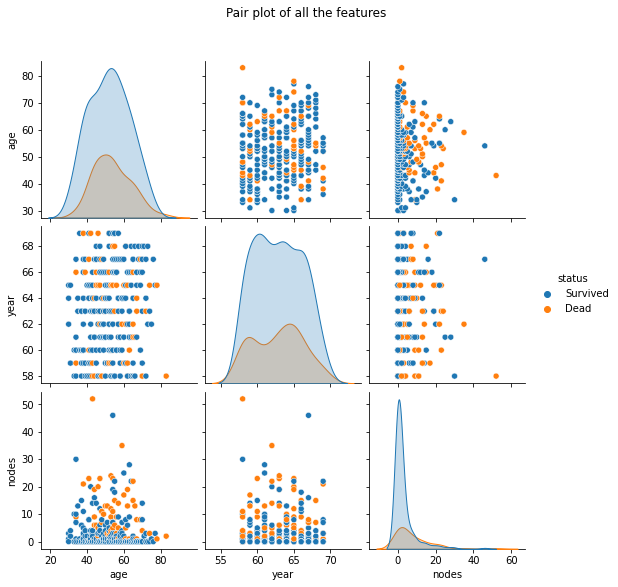

In [42]:
#zTook this from https://stackoverflow.com/questions/36813396/how-to-show-the-title-for-the-diagram-of-seaborn-pairplot-or-pridgrid/49594152
sns.pairplot(data,hue='status')
plt.suptitle("Pair plot of all the features", y=1.08)
plt.show()

***Pair plot observations:***

We cannot linearly separate using any single feature.
people with lesser nodes, means nodes less than 10 have survived more irrespective of age.We can see blue points accumulated around node 0 across all age groups.


# Scatter plot

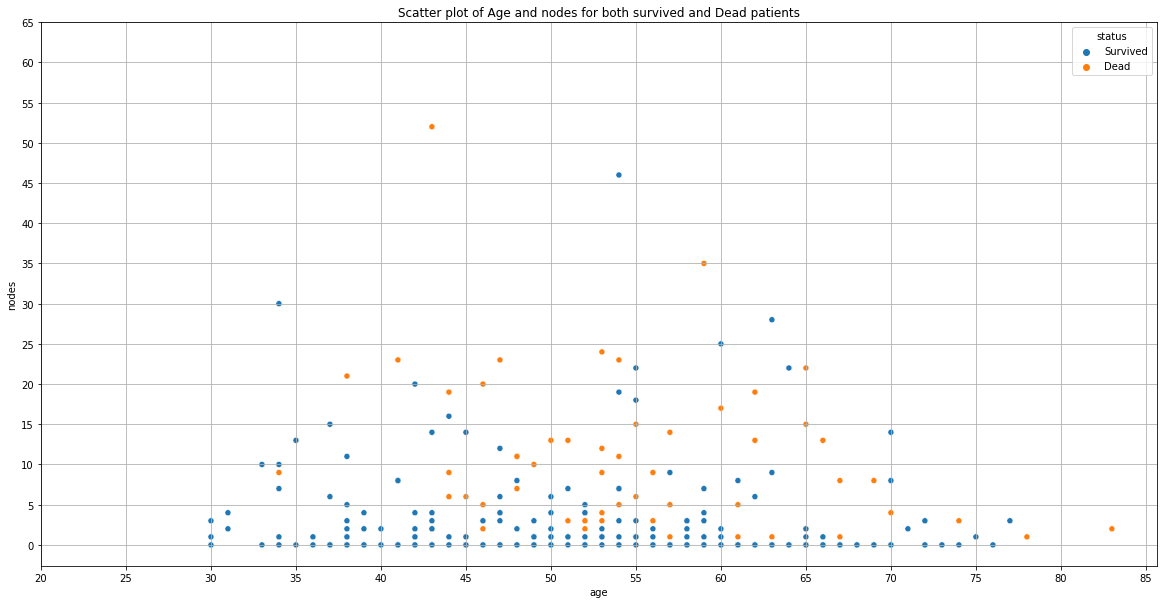

In [37]:

#based on aboe observation from age and nodes, ets draw a scatter plot.
fig,ax = plt.subplots(figsize=(20,10))
sns.scatterplot(x=data['age'],y=data['nodes'],hue=data['status'],ax=ax)
ax.set_xticks(range(20,90,5))
ax.set_yticks(range(0,70,5))
plt.title('Scatter plot of Age and nodes for both survived and Dead patients')
plt.grid()
plt.show()

We can confirm even though age being a lesser number and nodes being less, when combined,people with age less than 45 have survived more if they have lesse limp nodes.

people with 0 nodes have survived despite higher age.

always less number of nodes did not guarantee survival.because we have with less than 5 nodes who died if they are above 45 years of age.

so, age combined wih less number of nodes is faily a good combination of features.

# Box plots

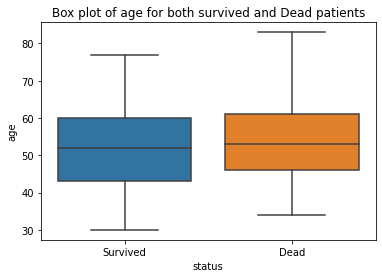

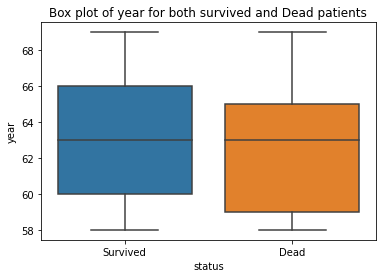

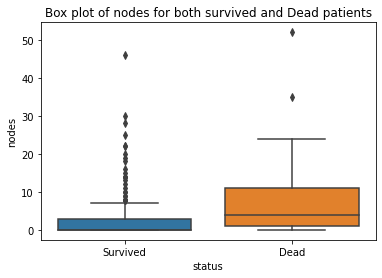

In [25]:
for feature in features:
  sns.boxplot(x=data['status'],y=data[feature])
  plt.title('Box plot of {} for both survived and Dead patients'.format(feature))
  plt.show()
  

***Age:***
Using box plots we can decode about outliers.
median of of both survived and dead patients is around 54-55 years of age.

even IQR ranges are about same.

***Nodes:***
box plot considers those who have survived with more than 10 nodes as outliers, This is in conjunction with our analysis using histogram, and even with scatter plot we confired same.

But having less nodes does not mean patient will survive, because we can see even the median nodes for dead patients is also less than 10.




# violin plots

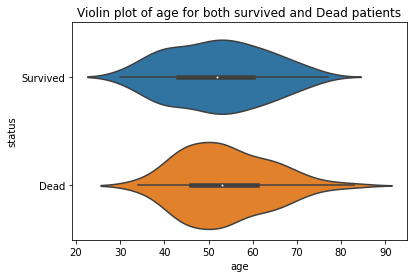

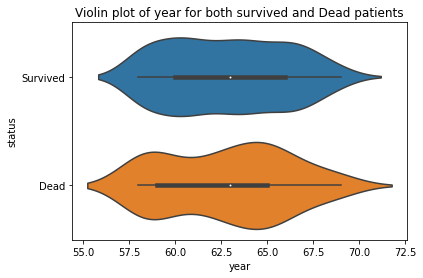

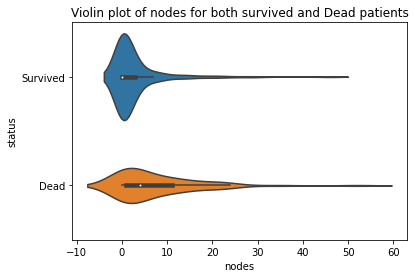

In [26]:
for feature in features:
  sns.violinplot(x=data[feature],y=data['status'])
  plt.title('Violin plot of {} for both survived and Dead patients'.format(feature))
  plt.show()

***Age:***
Even using violin plots also, we can confirm that median of survived and dead patients is about same and there is sgnificant overlap between the two groups.

***Nodes:***

Similar to our observation using histogram, we can say that concentration of survived patients is more around nodes 0-5.

distribution is right tailed.


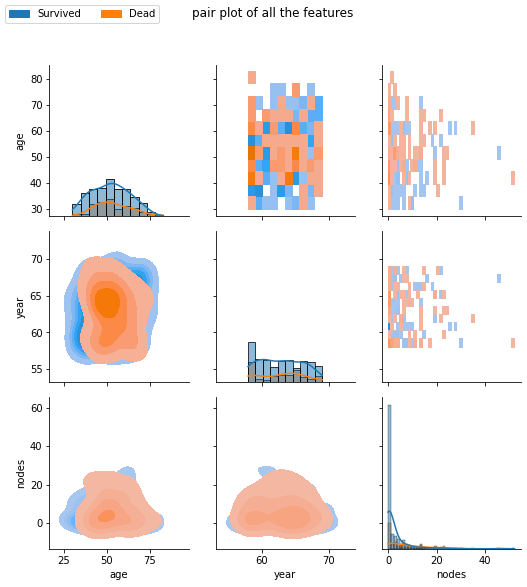

In [48]:
#Took code references from https://seaborn.pydata.org/tutorial/distributions.html
#https://stackoverflow.com/questions/59346731/no-handles-with-labels-found-to-put-in-legend
g = sns.PairGrid(data,hue='status')
g.fig.suptitle("Pair plot of all the features",y=1.08)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)
handles = g._legend_data.values()
labels = g._legend_data.keys()
g.fig.legend(handles=handles, labels=labels, loc='upper left', ncol=3)
plt.show()

Pair plot drawn to observe the contours and study the relationship between year and other parameters to undrstand why there are more deaths between years 1960-1965.

Looks like there are more people with age greater than 45 underwent surgery between 1960-1965.

When combined this with number of nodes,more peopl who underwent surgery between 1960-1965 also have nodes greater than 0. This might explain sudden spike in deaths.


# Conclusion

1. Data set is imbalanced,It has more survived records than Not survived records.We have around 73.5 % of records in survived and only 26.5 % records in Not survived.

2. Age alone is not a deciding factor in determining suvival rate,yet, people with age between 30-50 have far higher probability of survival.

3. Number of nodes plays active role in survival.It is inversely proportional to survival chance.people with less nodes have better chance of survival.

4. All the Peole with 0 affeted nodes have survived.Yet,some people with less number of affected nodes,like less than 5 nodes have died,when their age is greater than 45.

5. So, people with smaller age and less number of nodes have higher probability of surviving than others.

6. Year does not give mch information about surival rate, though there are more deaths between 1960-1965.This might be because more people aged aboe 45 underwent surgery between those years and those have mor than 0 affected nodes.
